In [1]:
#common imports
import pandas as pd

#for pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

#scikit imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
#Load train and test datasets
trainData = pd.read_csv('traing.csv')
testData = pd.read_csv('kaggle_hiv_test_data.csv')

In [3]:
#Data exploration
trainData.head()

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0,RT_score
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145,1055.504617
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224,1100.531513
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017,1121.486658
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206,412.265348
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572,1101.926365


In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
PatientID    1000 non-null int64
Resp         1000 non-null int64
PR Seq       920 non-null object
RT Seq       1000 non-null object
VL-t0        1000 non-null float64
CD4-t0       1000 non-null int64
RT_score     1000 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [5]:
trainData.describe()

,PatientID,Resp,VL-t0,CD4-t0,RT_score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,0.206000,4.29721,279.638000,1040.032525
std,288.819436,0.404633,0.70478,198.186712,158.855764
min,1.000000,0.000000,2.70000,0.000000,298.088922
25%,250.750000,0.000000,3.70000,132.750000,1020.764094
50%,500.500000,0.000000,4.30000,249.000000,1083.695634
75%,750.250000,0.000000,4.80000,383.250000,1111.230289
max,1000.000000,1.000000,6.00000,1589.000000,1264.175319


In [6]:
#HIV response positive, negative counts
trainData.Resp.value_counts()

0    794
1    206
Name: Resp, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a910e3b10>,
      dtype=object)

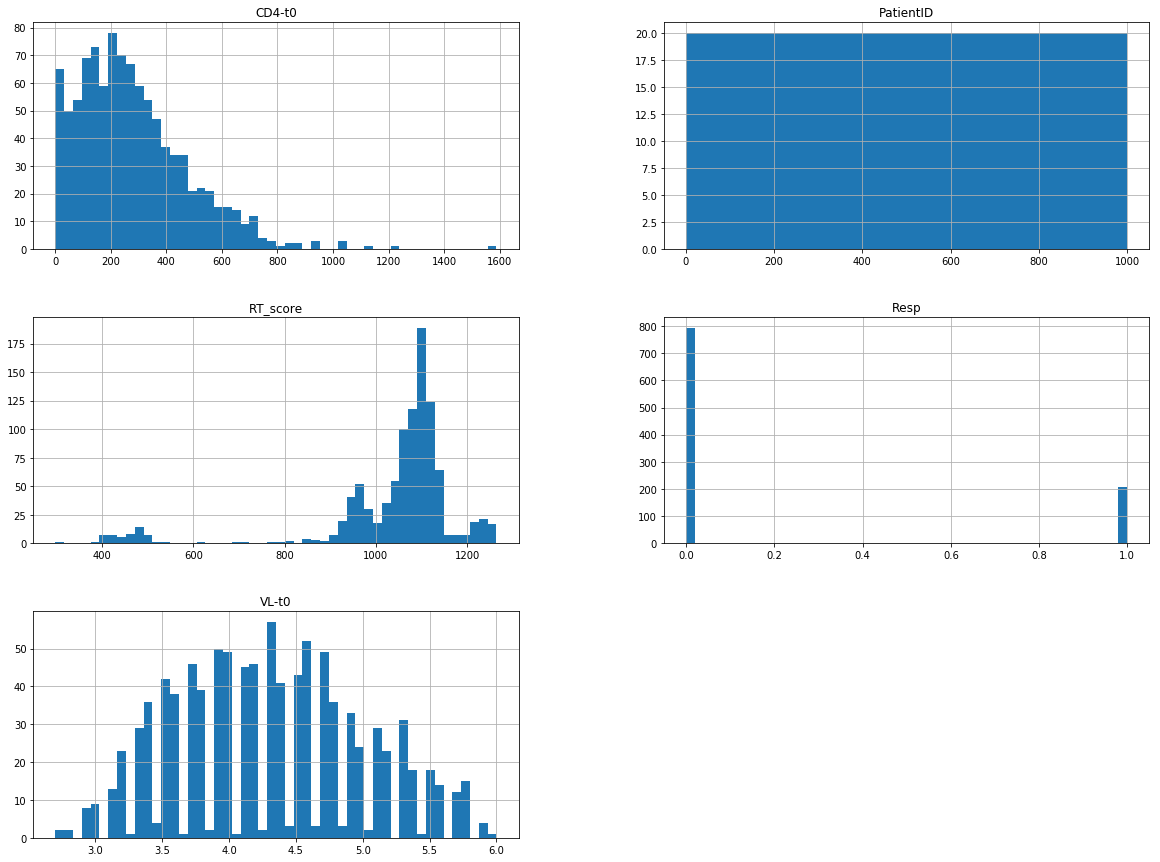

In [7]:
#plot histograms for trends exploration
#depicts distribution of each column in the dataframe 
%matplotlib inline
import matplotlib.pyplot as plt
trainData.hist(bins=50, figsize=(20,15))

In [8]:
#Look for response correlations
corr_matrix = trainData.corr()

In [9]:
#cor-relation of features to Respond status of patients
corr_matrix['Resp'].sort_values()

CD4-t0      -0.118626
PatientID    0.276525
RT_score     0.302479
VL-t0        0.362400
Resp         1.000000
Name: Resp, dtype: float64

## Test Using Viral Load

In [10]:
# Evaluate impact of 'VL-t0' on Resp
# split data into train and validation tests
featureSet = ['VL-t0']
X = trainData[featureSet]
y = trainData.Resp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# instantiate a logistic regression model, and fit with X and y
vlt0Model = LogisticRegression()
vlt0Model = vlt0Model.fit(X_train, y_train)

In [12]:
# predict class labels for the test set
vlt0Predicted = vlt0Model.predict(X_test)
print (vlt0Predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
# generate class probabilities
vlt0Probs = vlt0Model.predict_proba(X_test)
print (vlt0Probs)

[[0.67124755 0.32875245]
 [0.89174085 0.10825915]
 [0.81118588 0.18881412]
 [0.67124755 0.32875245]
 [0.90039627 0.09960373]
 [0.7109101  0.2890899 ]
 [0.65041078 0.34958922]
 [0.7109101  0.2890899 ]
 [0.81118588 0.18881412]
 [0.85026705 0.14973295]
 [0.81820422 0.18179578]
 [0.8824315  0.1175685 ]
 [0.81118588 0.18881412]
 [0.78104369 0.21895631]
 [0.69143158 0.30856842]
 [0.79653005 0.20346995]
 [0.8824315  0.1175685 ]
 [0.67124755 0.32875245]
 [0.89174085 0.10825915]
 [0.74758691 0.25241309]
 [0.81118588 0.18881412]
 [0.90039627 0.09960373]
 [0.82501796 0.17498204]
 [0.87243615 0.12756385]
 [0.85026705 0.14973295]
 [0.7109101  0.2890899 ]
 [0.60703598 0.39296402]
 [0.86717157 0.13282843]
 [0.81118588 0.18881412]
 [0.76472679 0.23527321]
 [0.85026705 0.14973295]
 [0.79653005 0.20346995]
 [0.90039627 0.09960373]
 [0.7109101  0.2890899 ]
 [0.76472679 0.23527321]
 [0.89174085 0.10825915]
 [0.60703598 0.39296402]
 [0.90039627 0.09960373]
 [0.72037089 0.27962911]
 [0.67124755 0.32875245]


In [14]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, vlt0Predicted))

#Area under Receiver Operating Characteristic Curve 
print (metrics.roc_auc_score(y_test, vlt0Probs[:, 1]))

0.775
0.7483974358974359


In [15]:
# predicted accuracy for Resp using VL-t0 data is 76.5%
# We can also see the confusion matrix and a classification report with other metrics.
print (metrics.confusion_matrix(y_test, vlt0Predicted))
print (metrics.classification_report(y_test, vlt0Predicted))

[[155   1]
 [ 44   0]]
             precision    recall  f1-score   support

          0       0.78      0.99      0.87       156
          1       0.00      0.00      0.00        44

avg / total       0.61      0.78      0.68       200



In [16]:
#Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.
#This results in a much better accuracy 79%
vlt0Scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (vlt0Scores)
print (vlt0Scores.mean())

[0.78217822 0.79207921 0.81188119 0.79207921 0.79       0.79
 0.78787879 0.78787879 0.78787879 0.7979798 ]
0.7919833983398341


## Test Using CD4 count

In [17]:
# Evaluate impact of 'CD4-t0' on Resp
# split data into train and validation tests
featureSet = ['CD4-t0']
X = trainData[featureSet]
y = trainData.Resp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# instantiate a logistic regression model, and fit with X and y
cd4t0Model = LogisticRegression()
cd4t0Model = cd4t0Model.fit(X_train, y_train)

In [19]:
# predict class labels for the test set
cd4t0Predicted = cd4t0Model.predict(X_test)
print (cd4t0Predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
# generate class probabilities
cd4t0Probs = cd4t0Model.predict_proba(X_test)
print (cd4t0Probs)

[[0.72486187 0.27513813]
 [0.89031503 0.10968497]
 [0.81485697 0.18514303]
 [0.80362493 0.19637507]
 [0.8591745  0.1408255 ]
 [0.80684417 0.19315583]
 [0.8103101  0.1896899 ]
 [0.83760323 0.16239677]
 [0.90535374 0.09464626]
 [0.76217622 0.23782378]
 [0.80713482 0.19286518]
 [0.89739476 0.10260524]
 [0.81931914 0.18068086]
 [0.85320115 0.14679885]
 [0.81737734 0.18262266]
 [0.81931914 0.18068086]
 [0.73443196 0.26556804]
 [0.74343107 0.25656893]
 [0.76419979 0.23580021]
 [0.74343107 0.25656893]
 [0.81513833 0.18486167]
 [0.77413822 0.22586178]
 [0.82558599 0.17441401]
 [0.83089499 0.16910501]
 [0.84750252 0.15249748]
 [0.79034364 0.20965636]
 [0.79188552 0.20811448]
 [0.78250861 0.21749139]
 [0.77446433 0.22553567]
 [0.79372472 0.20627528]
 [0.73624781 0.26375219]
 [0.75945959 0.24054041]
 [0.85084845 0.14915155]
 [0.81904273 0.18095727]
 [0.73297355 0.26702645]
 [0.75637814 0.24362186]
 [0.71773459 0.28226541]
 [0.79706526 0.20293474]
 [0.78566775 0.21433225]
 [0.71355746 0.28644254]


In [21]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, cd4t0Predicted))
print (metrics.roc_auc_score(y_test, cd4t0Probs[:, 1]))

0.78
0.5764131701631702


In [22]:
# predicted accuracy for Resp using CD4-t0 data is 78%
# We can also see the confusion matrix and a classification report with other metrics.
print (metrics.confusion_matrix(y_test, cd4t0Predicted))
print (metrics.classification_report(y_test, cd4t0Predicted))

[[156   0]
 [ 44   0]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.88       156
          1       0.00      0.00      0.00        44

avg / total       0.61      0.78      0.68       200



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
#Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.
#Accuracy improved slightly to 79.4%
cd4t0Scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (cd4t0Scores)
print (cd4t0Scores.mean())

[0.79207921 0.79207921 0.79207921 0.79207921 0.79       0.79
 0.7979798  0.7979798  0.7979798  0.7979798 ]
0.794023602360236


## Test using both CD4-t0 and VL-t0 to predict Resp

In [24]:
featureSet = ['VL-t0', 'CD4-t0']
X = trainData[featureSet]
y = trainData.Resp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# instantiate a logistic regression model, and fit with X and y
logRegModel = LogisticRegression()
logRegModel = logRegModel.fit(X_train, y_train)

In [26]:
# predict class labels for the test set
logRegPredicted = logRegModel.predict(X_test)
print (logRegPredicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
# generate class probabilities
logRegProbs = logRegModel.predict_proba(X_test)
print (logRegProbs)

[[0.64960483 0.35039517]
 [0.91097513 0.08902487]
 [0.81748785 0.18251215]
 [0.6822311  0.3177689 ]
 [0.91046757 0.08953243]
 [0.72084664 0.27915336]
 [0.66584556 0.33415444]
 [0.73476352 0.26523648]
 [0.8529693  0.1470307 ]
 [0.84029005 0.15970995]
 [0.82157815 0.17842185]
 [0.90564478 0.09435522]
 [0.8189675  0.1810325 ]
 [0.80444076 0.19555924]
 [0.70739808 0.29260192]
 [0.80541321 0.19458679]
 [0.86737419 0.13262581]
 [0.65678817 0.34321183]
 [0.88284805 0.11715195]
 [0.73195742 0.26804258]
 [0.8175806  0.1824194 ]
 [0.89352133 0.10647867]
 [0.83376645 0.16623355]
 [0.87874064 0.12125936]
 [0.86339923 0.13660077]
 [0.71391336 0.28608664]
 [0.61612251 0.38387749]
 [0.86203246 0.13796754]
 [0.80482398 0.19517602]
 [0.76637935 0.23362065]
 [0.834018   0.165982  ]
 [0.78580986 0.21419014]
 [0.90862604 0.09137396]
 [0.7261949  0.2738051 ]
 [0.7456292  0.2543708 ]
 [0.88136081 0.11863919]
 [0.58390304 0.41609696]
 [0.89776331 0.10223669]
 [0.7210318  0.2789682 ]
 [0.64534717 0.35465283]


In [28]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, logRegPredicted))
print (metrics.roc_auc_score(y_test, logRegProbs[:, 1]))

0.765
0.7357954545454546


In [29]:
# predicted accuracy for Resp using both CD4-t0 and VL-t0 data is 76.5%
# We can also see the confusion matrix and a classification report with other metrics.
print (metrics.confusion_matrix(y_test, logRegPredicted))
print (metrics.classification_report(y_test, logRegPredicted))

[[153   3]
 [ 44   0]]
             precision    recall  f1-score   support

          0       0.78      0.98      0.87       156
          1       0.00      0.00      0.00        44

avg / total       0.61      0.77      0.68       200



In [30]:
#Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.
#Accuracy improved to 78.9%
logRegScores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (logRegScores)
print (logRegScores.mean())

[0.78217822 0.78217822 0.8019802  0.78217822 0.79       0.79
 0.78787879 0.78787879 0.78787879 0.7979798 ]
0.789013101310131


## Add K-mer as a Feature

A = adenine
C = cytosine
G = guanine
T = thymine
R = G A (purine)
Y = T C (pyrimidine)
K = G T (keto)
M = A C (amino)
S = G C (strong bonds)
W = A T (weak bonds)
B = G T C (all but A)
D = G A T (all but C)
H = A C T (all but G)
V = G C A (all but T)
N = A G C T (any)

In [31]:
#count occurences nucleotides 
#Cases of multiple nucleotide possibility as not considered

for index, row in trainData.iterrows():
    A_count = 0
    C_count = 0
    G_count = 0
    T_count = 0  
    for x in row['RT Seq']:
        if x == "A":
            A_count = A_count + 1
        elif x == "C":
            C_count = C_count + 1
        elif x == "G":
            G_count = G_count + 1
        elif x == "T":
            T_count = T_count + 1
        
    trainData["A_count"] =  A_count
    trainData["C_count"] =  C_count
    trainData["G_count"] =  G_count
    trainData["T_count"] =  T_count

In [33]:
featureSet = ['VL-t0', 'CD4-t0','RT_score','A_count','C_count','G_count','T_count']
X = trainData[featureSet]
y = trainData.Resp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# instantiate a logistic regression model, and fit with X and y
logRegModel = LogisticRegression()
logRegModel = logRegModel.fit(X_train, y_train)

In [35]:
# predict class labels for the test set
logRegPredicted = logRegModel.predict(X_test)
print (logRegPredicted)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [36]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, logRegPredicted))


0.84


In [37]:
#Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.
#Accuracy improved to 81%
logRegScores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (logRegScores.mean())

0.8678992899289929


## Using TestData 

In [ ]:
len(testData)

In [ ]:
#Let's use the provided validation data to check accuracy
featureSet = ['VL-t0', 'CD4-t0']
X_eval = testData[featureSet]
y_eval = testData.Resp
len(y_eval)

In [ ]:
# predict class labels for the eval set
#logRegPredicted = logRegModel.predict(X_eval)
#print (logRegPredicted)

In [ ]:
# generate class probabilities
#logRegProbs = logRegModel.predict_proba(X_eval)
#print (logRegProbs)
#print len(logRegProbs)
#print len(y_eval)